In [6]:
# Veri işlemleri için
import pandas as pd
import numpy as np

# Görselleştirme için
import matplotlib.pyplot as plt
import seaborn as sns

# Uyarıları gizlemek için (isteğe bağlı)
import warnings
warnings.filterwarnings("ignore")

In [37]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2009_to_2011.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2005_to_2007.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accident_coords_update.ipynb
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/ukTrafficAADF.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/Areas.shp
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/Local_Authority_Districts_Dec_2016.geojson


In [38]:
# Trafik verisi
traffic_df = pd.read_csv('/kaggle/input/2000-16-traffic-flow-england-scotland-wales/ukTrafficAADF.csv')

# Kaza verileri
accidents_df1 = pd.read_csv('/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2005_to_2007.csv')
accidents_df2 = pd.read_csv('/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2009_to_2011.csv')
accidents_df3 = pd.read_csv('/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv')

# Kaza verilerini birleştiriyoruz
accidents_df = pd.concat([accidents_df1, accidents_df2, accidents_df3], ignore_index=True)

In [5]:
# Trafik verisinin ilk 5 satırına göz atalım
traffic_df.head()


,AADFYear,CP,Estimation_method,Estimation_method_detailed,Region,LocalAuthority,Road,RoadCategory,Easting,Northing,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
0,2000,6007,Counted,Manual count,Yorkshire and the Humber,Rotherham,M1,TM,446000,389300,...,5351,656,711,1588,4715,2149,15170,111146,53.398531,-1.309655
1,2000,6009,Counted,Manual count,Yorkshire and the Humber,Leeds,M621,TM,432150,429500,...,1293,272,287,628,1494,921,4895,65939,53.760869,-1.513814
2,2000,6035,Counted,Manual count,Yorkshire and the Humber,Doncaster,M18,TM,466400,407900,...,1952,257,239,745,3695,2000,8888,40229,53.563523,-0.998970
3,2000,6054,Counted,Manual count,Yorkshire and the Humber,Calderdale,M62,TM,404000,416600,...,3121,508,354,1786,5902,3438,15109,85759,53.645893,-1.940967
4,2000,6055,Counted,Manual count,Yorkshire and the Humber,Leeds,M62,TM,426000,426200,...,4030,624,423,1947,6669,3743,17436,98487,53.731551,-1.607374


In [6]:
# Trafik verisinin genel bilgisi
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275385 entries, 0 to 275384
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AADFYear                    275385 non-null  int64  
 1   CP                          275385 non-null  int64  
 2   Estimation_method           237812 non-null  object 
 3   Estimation_method_detailed  237812 non-null  object 
 4   Region                      275385 non-null  object 
 5   LocalAuthority              275385 non-null  object 
 6   Road                        275385 non-null  object 
 7   RoadCategory                275385 non-null  object 
 8   Easting                     275385 non-null  int64  
 9   Northing                    275385 non-null  int64  
 10  StartJunction               275129 non-null  object 
 11  EndJunction                 275147 non-null  object 
 12  LinkLength_km               275385 non-null  float64
 13  LinkLength_mil

In [7]:
# Genel özet trafik istatistikleri
traffic_df.describe()

,AADFYear,CP,Easting,Northing,LinkLength_km,LinkLength_miles,PedalCycles,Motorcycles,CarsTaxis,BusesCoaches,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
count,275385.000000,275385.000000,275385.000000,2.753850e+05,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,...,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000
mean,2007.967907,47277.490437,425675.250780,3.561826e+05,2.757116,1.712899,123.314654,222.099297,16813.332923,248.662175,...,489.379193,83.551450,88.924513,74.249433,247.927389,271.747354,1255.774163,21152.693542,53.092936,-1.654634
std,4.862875,27004.889605,98687.570954,1.869923e+05,3.815569,2.371086,421.440798,420.874069,16618.266842,374.650774,...,683.713666,121.773472,142.005359,183.767833,752.311296,835.966781,2446.175298,21536.689989,1.681459,1.478250
min,2000.000000,60.000000,69987.000000,7.625000e+04,0.070000,0.040000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.583853,-7.442680
25%,2004.000000,26218.000000,352970.000000,1.921200e+05,0.600000,0.370000,5.000000,58.000000,7125.000000,60.000000,...,148.000000,24.000000,15.000000,7.000000,9.000000,10.000000,252.000000,8941.000000,51.614977,-2.711540
50%,2008.000000,47252.000000,430000.000000,3.240000e+05,1.400000,0.870000,26.000000,113.000000,12255.000000,127.000000,...,273.000000,46.000000,41.000000,20.000000,34.000000,37.000000,489.000000,15143.000000,52.807705,-1.549475
75%,2012.000000,74392.000000,510600.000000,4.296000e+05,3.200000,1.990000,83.000000,214.000000,19951.000000,280.000000,...,517.000000,91.000000,100.000000,56.000000,125.000000,137.000000,1041.000000,24660.000000,53.760638,-0.389834
max,2016.000000,99967.000000,655040.000000,1.205400e+06,55.500000,34.490000,18629.000000,9815.000000,207133.000000,11359.000000,...,10942.000000,5968.000000,3684.000000,3949.000000,11034.000000,13758.000000,27095.000000,262842.000000,60.727231,1.754553


In [8]:
# Eksik veri kontrolü
traffic_df.isnull().sum()

AADFYear                          0
CP                                0
Estimation_method             37573
Estimation_method_detailed    37573
Region                            0
LocalAuthority                    0
Road                              0
RoadCategory                      0
Easting                           0
Northing                          0
StartJunction                   256
EndJunction                     238
LinkLength_km                     0
LinkLength_miles                  0
PedalCycles                       0
Motorcycles                       0
CarsTaxis                         0
BusesCoaches                      0
LightGoodsVehicles                0
V2AxleRigidHGV                    0
V3AxleRigidHGV                    0
V4or5AxleRigidHGV                 0
V3or4AxleArticHGV                 0
V5AxleArticHGV                    0
V6orMoreAxleArticHGV              0
AllHGVs                           0
AllMotorVehicles                  0
Lat                         

In [9]:
# Yeksikleri "Unknown" gibi bir etiketle doldurabiliriz
traffic_df['Estimation_method'].fillna('Unknown', inplace=True)
traffic_df['Estimation_method_detailed'].fillna('Unknown', inplace=True)
traffic_df['StartJunction'].fillna('Unknown', inplace=True)
traffic_df['EndJunction'].fillna('Unknown', inplace=True)

In [10]:
# Yıllara Göre Gözlem Dağılımı
traffic_df['AADFYear'].value_counts().sort_index()

AADFYear
2000    16146
2001    16157
2002    16175
2003    16158
2004    16210
2005    16306
2006    16366
2007    16363
2008    16338
2009    16379
2010    16358
2011    16344
2012    16445
2013    16467
2014    16500
2015    16504
2016    14169
Name: count, dtype: int64

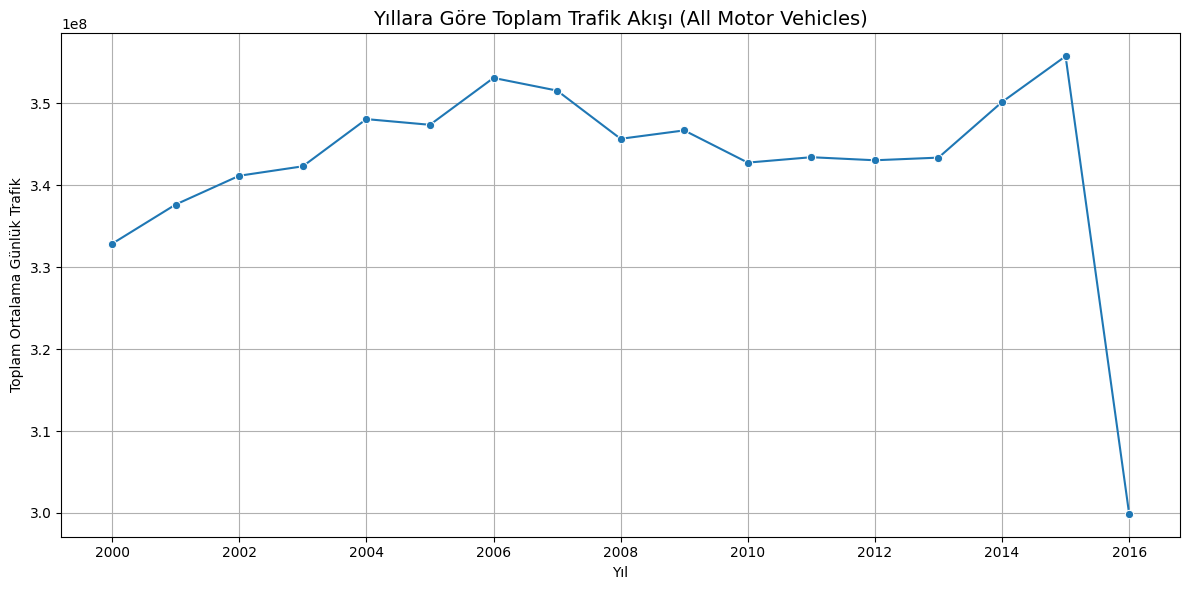

In [11]:
# Yıllara göre toplam motorlu araç sayısı (ortalama günlük sayım)
traffic_by_year = traffic_df.groupby('AADFYear')['AllMotorVehicles'].sum().reset_index()

# Grafik çizimi
plt.figure(figsize=(12, 6))
sns.lineplot(data=traffic_by_year, x='AADFYear', y='AllMotorVehicles', marker='o')
plt.title('Yıllara Göre Toplam Trafik Akışı (All Motor Vehicles)', fontsize=14)
plt.xlabel('Yıl')
plt.ylabel('Toplam Ortalama Günlük Trafik')
plt.grid(True)
plt.tight_layout()
plt.show()

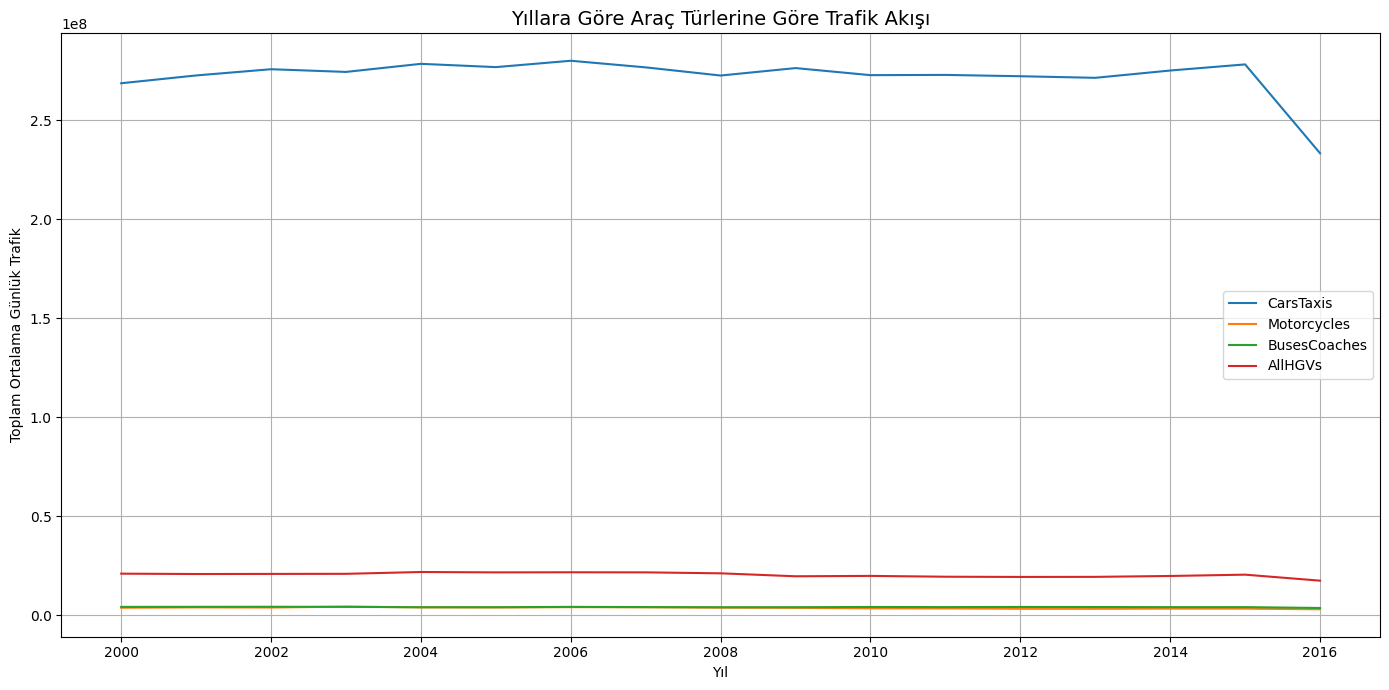

In [12]:
# Araç türlerine göre gruplama
vehicle_types = ['CarsTaxis', 'Motorcycles', 'BusesCoaches', 'AllHGVs']

# Yıllara göre toplamlar
traffic_by_vehicle = traffic_df.groupby('AADFYear')[vehicle_types].sum().reset_index()

# Grafik çizimi
plt.figure(figsize=(14, 7))
for vehicle in vehicle_types:
    sns.lineplot(data=traffic_by_vehicle, x='AADFYear', y=vehicle, label=vehicle)

plt.title('Yıllara Göre Araç Türlerine Göre Trafik Akışı', fontsize=14)
plt.xlabel('Yıl')
plt.ylabel('Toplam Ortalama Günlük Trafik')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
# Kaza verisinin genel yapısını inceleyelim
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         1

In [14]:
# İlk birkaç satıra göz atalım
accidents_df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


In [15]:
# Eksik veri kontrolü
accidents_df.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [16]:
# %90'dan fazla eksik olan sütunları kaldır
threshold = 0.9
missing_ratios = accidents_df.isnull().mean()
cols_to_drop = missing_ratios[missing_ratios > threshold].index
accidents_df.drop(columns=cols_to_drop, inplace=True)

In [17]:
# 'Time' sütununu en yaygın zamanla doldur (mod)
accidents_df['Time'].fillna(accidents_df['Time'].mode()[0], inplace=True)

In [18]:
# Konum verileri: ortalama ile doldur (sayısal değer)
for col in ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude']:
    accidents_df[col].fillna(accidents_df[col].mean(), inplace=True)

In [19]:
# Yaya geçidi bilgileri (Mod) ile doldur
accidents_df['Pedestrian_Crossing-Human_Control'].fillna(accidents_df['Pedestrian_Crossing-Human_Control'].mode()[0], inplace=True)
accidents_df['Pedestrian_Crossing-Physical_Facilities'].fillna(accidents_df['Pedestrian_Crossing-Physical_Facilities'].mode()[0], inplace=True)

In [20]:
# Hava, yüzey koşulları (Mod) ile doldur
accidents_df['Weather_Conditions'].fillna(accidents_df['Weather_Conditions'].mode()[0], inplace=True)
accidents_df['Road_Surface_Conditions'].fillna(accidents_df['Road_Surface_Conditions'].mode()[0], inplace=True)

In [21]:
# Polis memuru durumu (Mod) ile doldur
accidents_df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(accidents_df['Did_Police_Officer_Attend_Scene_of_Accident'].mode()[0], inplace=True)

In [22]:
# LSOA bölgesi (Mod) ile doldur
# Kategorik olduğu için yine mod kullanılabilir
accidents_df['LSOA_of_Accident_Location'].fillna(accidents_df['LSOA_of_Accident_Location'].mode()[0], inplace=True)

In [23]:
# Eksik Junction_Control verilerini "Unknown" olarak doldur
accidents_df['Junction_Control'].fillna('Unknown', inplace=True)

In [24]:
print(accidents_df.isnull().sum())

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number     

In [25]:
# YILLARA GÖRE KAZA SAYISI VE TRAFİK AKIŞI
# Kazaların yıllık toplamı
accidents_df['Accident_Year'] = pd.to_datetime(accidents_df['Date'], dayfirst=True).dt.year
yearly_accidents = accidents_df.groupby('Accident_Year').size().reset_index(name='Accident_Count')

# Trafik akışı yıllık toplamı
yearly_traffic = traffic_df.groupby('AADFYear')['AllMotorVehicles'].sum().reset_index(name='Total_Traffic')

# Yılları eşitlemek için ortak yıl kümesini al
common_years = set(yearly_accidents['Accident_Year']).intersection(set(yearly_traffic['AADFYear']))

# Ortak yıllarla filtrele
yearly_accidents = yearly_accidents[yearly_accidents['Accident_Year'].isin(common_years)]
yearly_traffic = yearly_traffic[yearly_traffic['AADFYear'].isin(common_years)]

# Birleştir
merged_df = pd.merge(yearly_accidents, yearly_traffic, left_on='Accident_Year', right_on='AADFYear')

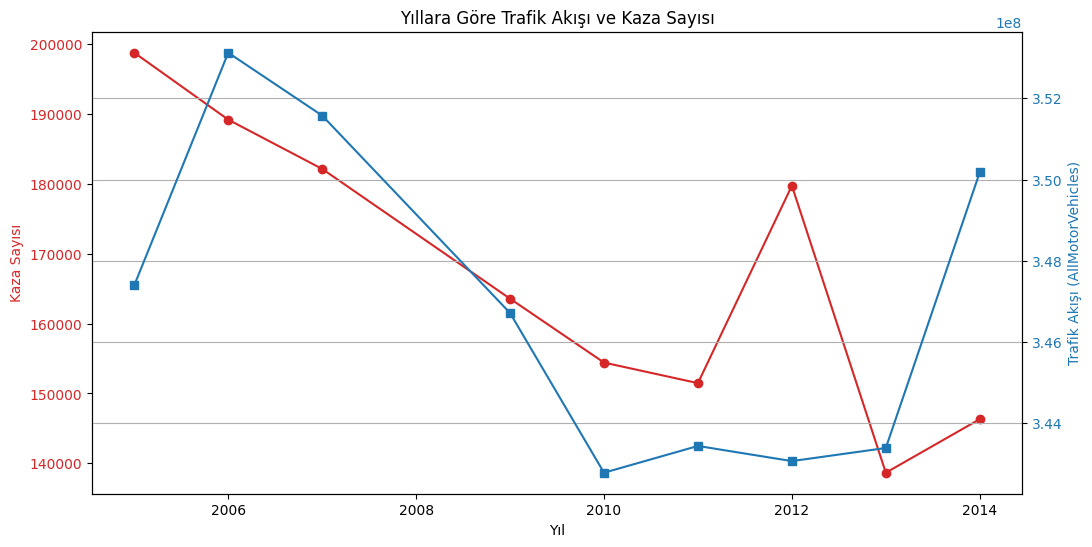

In [26]:
# GRAFİK
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel('Yıl')
ax1.set_ylabel('Kaza Sayısı', color='tab:red')
ax1.plot(merged_df['Accident_Year'], merged_df['Accident_Count'], color='tab:red', marker='o', label='Kaza Sayısı')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Trafik Akışı (AllMotorVehicles)', color='tab:blue')
ax2.plot(merged_df['AADFYear'], merged_df['Total_Traffic'], color='tab:blue', marker='s', label='Trafik Akışı')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title("Yıllara Göre Trafik Akışı ve Kaza Sayısı")
plt.grid(True)
plt.show()


In [27]:
# trafik akışı ile kaza sayısı arasındaki ilişkiyi Pearson korelasyon katsayısı ile analiz edelim
import pandas as pd
from scipy.stats import pearsonr

# Trafik akışı verisini içeren dataframe (örnek adı: traffic_df)
# Aşağıdaki iki değişkenin aynı yıl aralığını kapsadığından emin olalım.
merged_df = pd.merge(
    yearly_accidents,  # Kazaların yıllık toplamı
    traffic_df[['AADFYear', 'AllMotorVehicles']],  # Trafik akışı verileri
    left_on='Accident_Year', right_on='AADFYear'
)

# Korelasyon analizi
correlation = merged_df['Accident_Count'].corr(merged_df['AllMotorVehicles'])
print("Kaza Sayısı ile Trafik Akışı Arasındaki Korelasyon:", correlation)

Kaza Sayısı ile Trafik Akışı Arasındaki Korelasyon: 0.007000264376838273


In [28]:
# Yıllık toplam kaza sayısını hesapla
accidents_df['Accident_Year'] = pd.to_datetime(accidents_df['Date'], dayfirst=True).dt.year
yearly_accidents = accidents_df.groupby('Accident_Year').size().reset_index(name='Accident_Count')

# Trafik verisinde yıl sütunu zaten 'AADFYear'
traffic_yearly = traffic_df.groupby('AADFYear')['AllMotorVehicles'].sum().reset_index()

# Birleştir
merged_df = pd.merge(
    yearly_accidents,
    traffic_yearly,
    left_on='Accident_Year',
    right_on='AADFYear'
)

# Kaza oranı hesapla
merged_df['Accident_Rate'] = merged_df['Accident_Count'] / merged_df['AllMotorVehicles']

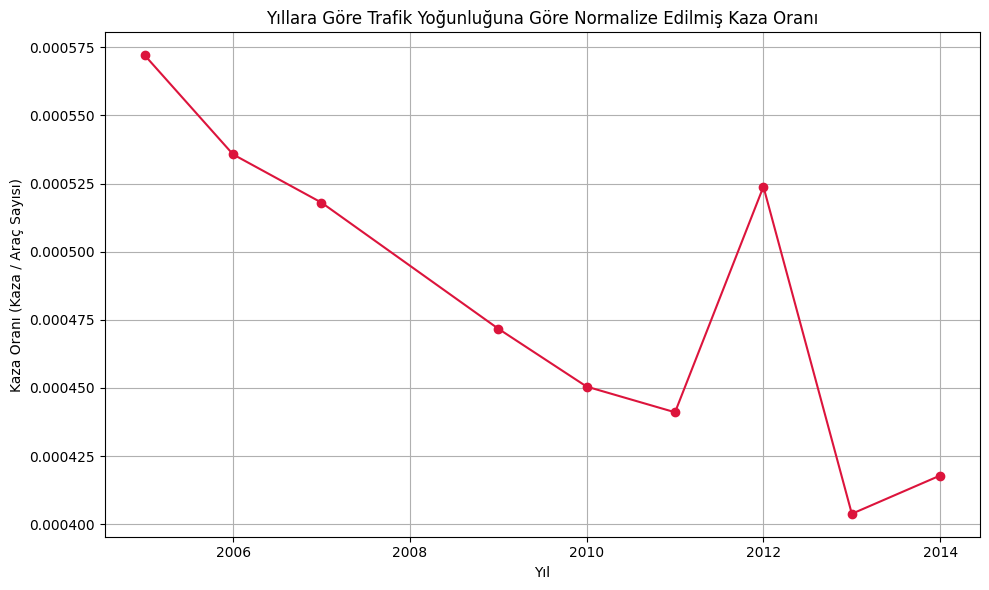

In [29]:
plt.figure(figsize=(10,6))
plt.plot(merged_df['Accident_Year'], merged_df['Accident_Rate'], marker='o', color='crimson')
plt.title("Yıllara Göre Trafik Yoğunluğuna Göre Normalize Edilmiş Kaza Oranı")
plt.xlabel("Yıl")
plt.ylabel("Kaza Oranı (Kaza / Araç Sayısı)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
# 2012 yılına ait kaza verilerini filtrele
accidents_2012 = accidents_df[accidents_df['Accident_Year'] == 2012]

# Kaza şiddeti dağılımı
severity_counts = accidents_2012['Accident_Severity'].value_counts()

# Şehir içi/şehirdışı dağılımı
urban_rural_counts = accidents_2012['Urban_or_Rural_Area'].value_counts()

# Yol tipi dağılımı
road_type_counts = accidents_2012['Road_Type'].value_counts()

print("Kaza Şiddeti Dağılımı:\n", severity_counts)
print("\nŞehir İçi / Dışı Dağılımı:\n", urban_rural_counts)
print("\nYol Tipi Dağılımı:\n", road_type_counts)


Kaza Şiddeti Dağılımı:
 Accident_Severity
3    151194
2     26484
1      2037
Name: count, dtype: int64

Şehir İçi / Dışı Dağılımı:
 Urban_or_Rural_Area
1    121609
2     58106
Name: count, dtype: int64

Yol Tipi Dağılımı:
 Road_Type
Single carriageway    136236
Dual carriageway       25424
Roundabout             12118
One way street          3395
Slip road               1862
Unknown                  680
Name: count, dtype: int64


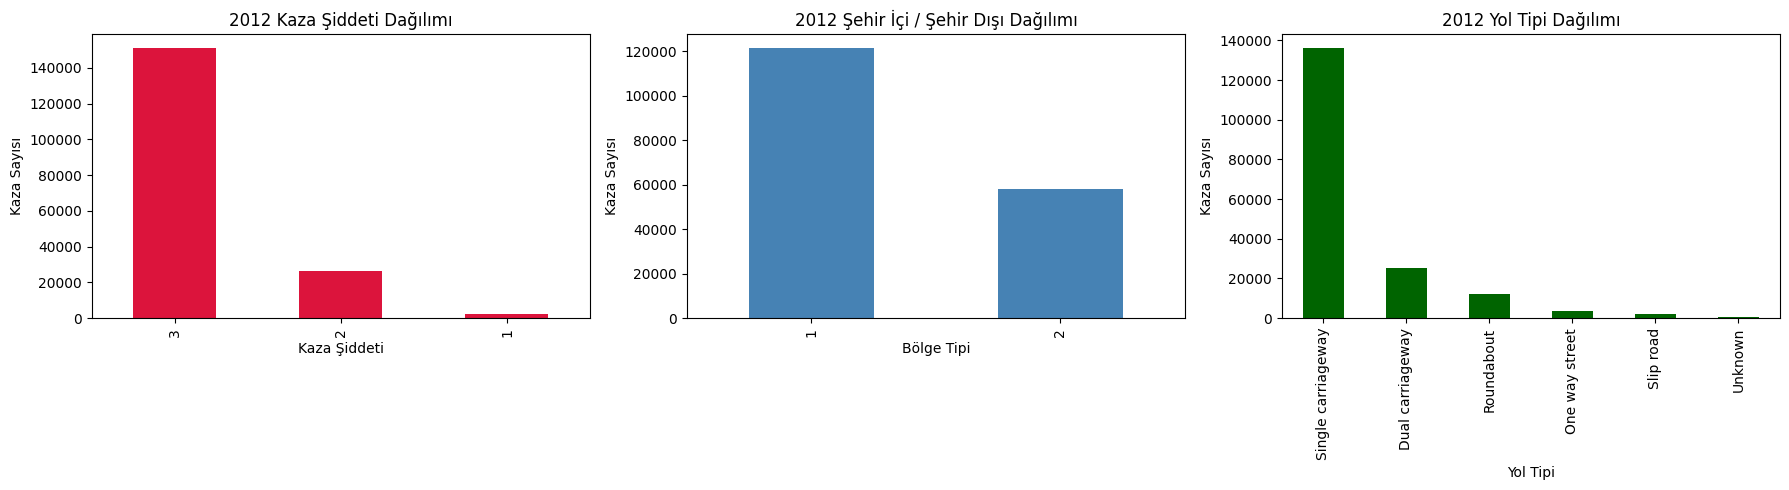

In [31]:
# Kaza Şiddeti Grafiği
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Kaza Şiddeti Dağılımı
severity_counts.plot(kind='bar', ax=axes[0], color='crimson')
axes[0].set_title('2012 Kaza Şiddeti Dağılımı')
axes[0].set_ylabel('Kaza Sayısı')
axes[0].set_xlabel('Kaza Şiddeti')

# Şehir İçi / Şehir Dışı Dağılımı
urban_rural_counts.plot(kind='bar', ax=axes[1], color='steelblue')
axes[1].set_title('2012 Şehir İçi / Şehir Dışı Dağılımı')
axes[1].set_ylabel('Kaza Sayısı')
axes[1].set_xlabel('Bölge Tipi')

# Yol Tipi Dağılımı
road_type_counts.plot(kind='bar', ax=axes[2], color='darkgreen')
axes[2].set_title('2012 Yol Tipi Dağılımı')
axes[2].set_ylabel('Kaza Sayısı')
axes[2].set_xlabel('Yol Tipi')

plt.tight_layout()
plt.show()

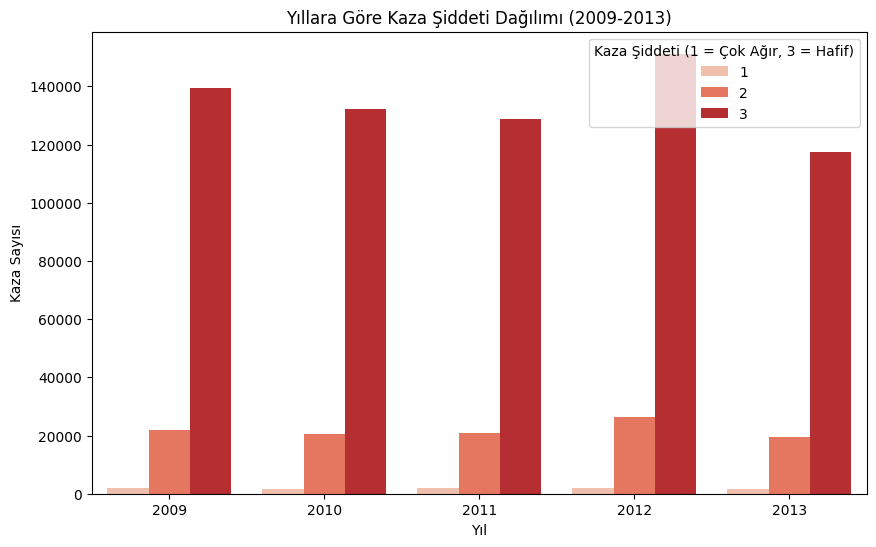

In [32]:
# Yıllara Göre Kaza Şiddeti Dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(data=accidents_df[accidents_df['Year'].between(2009, 2013)],
              x='Year', hue='Accident_Severity', palette='Reds')
plt.title('Yıllara Göre Kaza Şiddeti Dağılımı (2009-2013)')
plt.xlabel('Yıl')
plt.ylabel('Kaza Sayısı')
plt.legend(title='Kaza Şiddeti (1 = Çok Ağır, 3 = Hafif)')
plt.show()


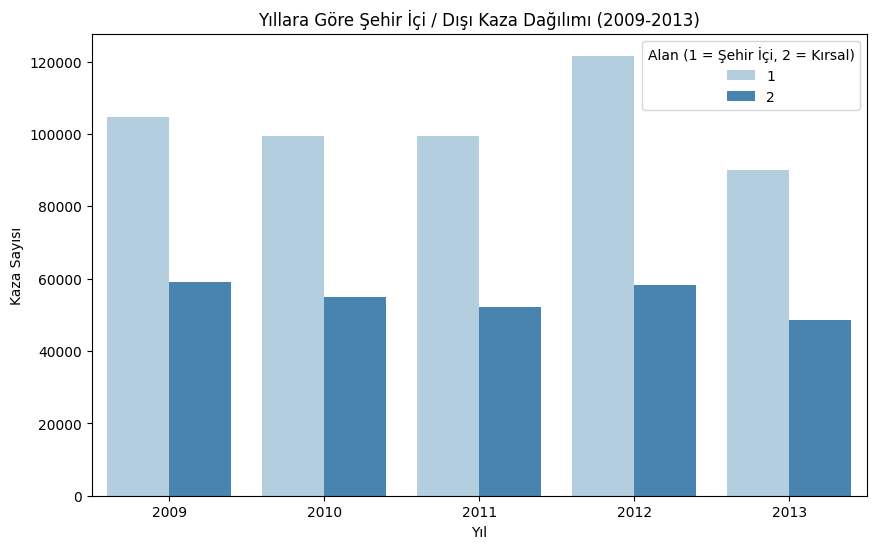

In [33]:
# Yıllara Göre Şehir İçi / Dışı Kaza Dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(data=accidents_df[accidents_df['Year'].between(2009, 2013)],
              x='Year', hue='Urban_or_Rural_Area', palette='Blues')
plt.title('Yıllara Göre Şehir İçi / Dışı Kaza Dağılımı (2009-2013)')
plt.xlabel('Yıl')
plt.ylabel('Kaza Sayısı')
plt.legend(title='Alan (1 = Şehir İçi, 2 = Kırsal)')
plt.show()

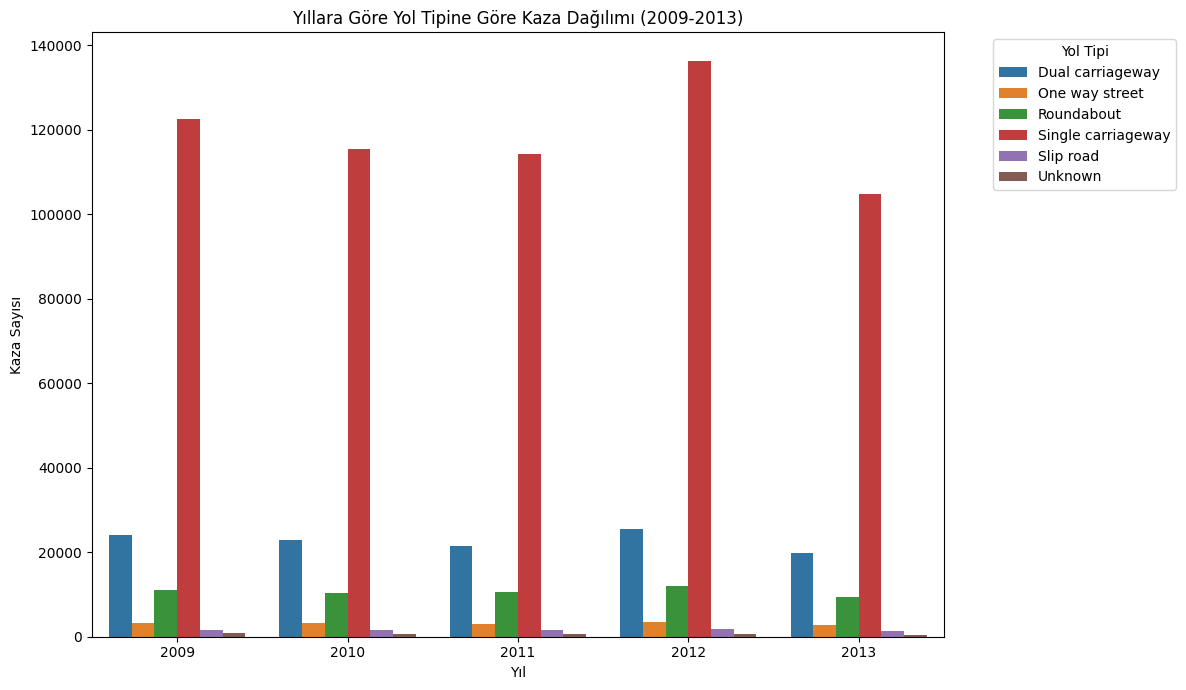

In [34]:
# Yıllara Göre Yol Tipine Göre Kaza Dağılımı
plt.figure(figsize=(12, 7))
road_counts = (accidents_df[accidents_df['Year'].between(2009, 2013)]
               .groupby(['Year', 'Road_Type'])
               .size()
               .reset_index(name='Kaza_Sayısı'))

sns.barplot(data=road_counts, x='Year', y='Kaza_Sayısı', hue='Road_Type')
plt.title('Yıllara Göre Yol Tipine Göre Kaza Dağılımı (2009-2013)')
plt.xlabel('Yıl')
plt.ylabel('Kaza Sayısı')
plt.legend(title='Yol Tipi', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

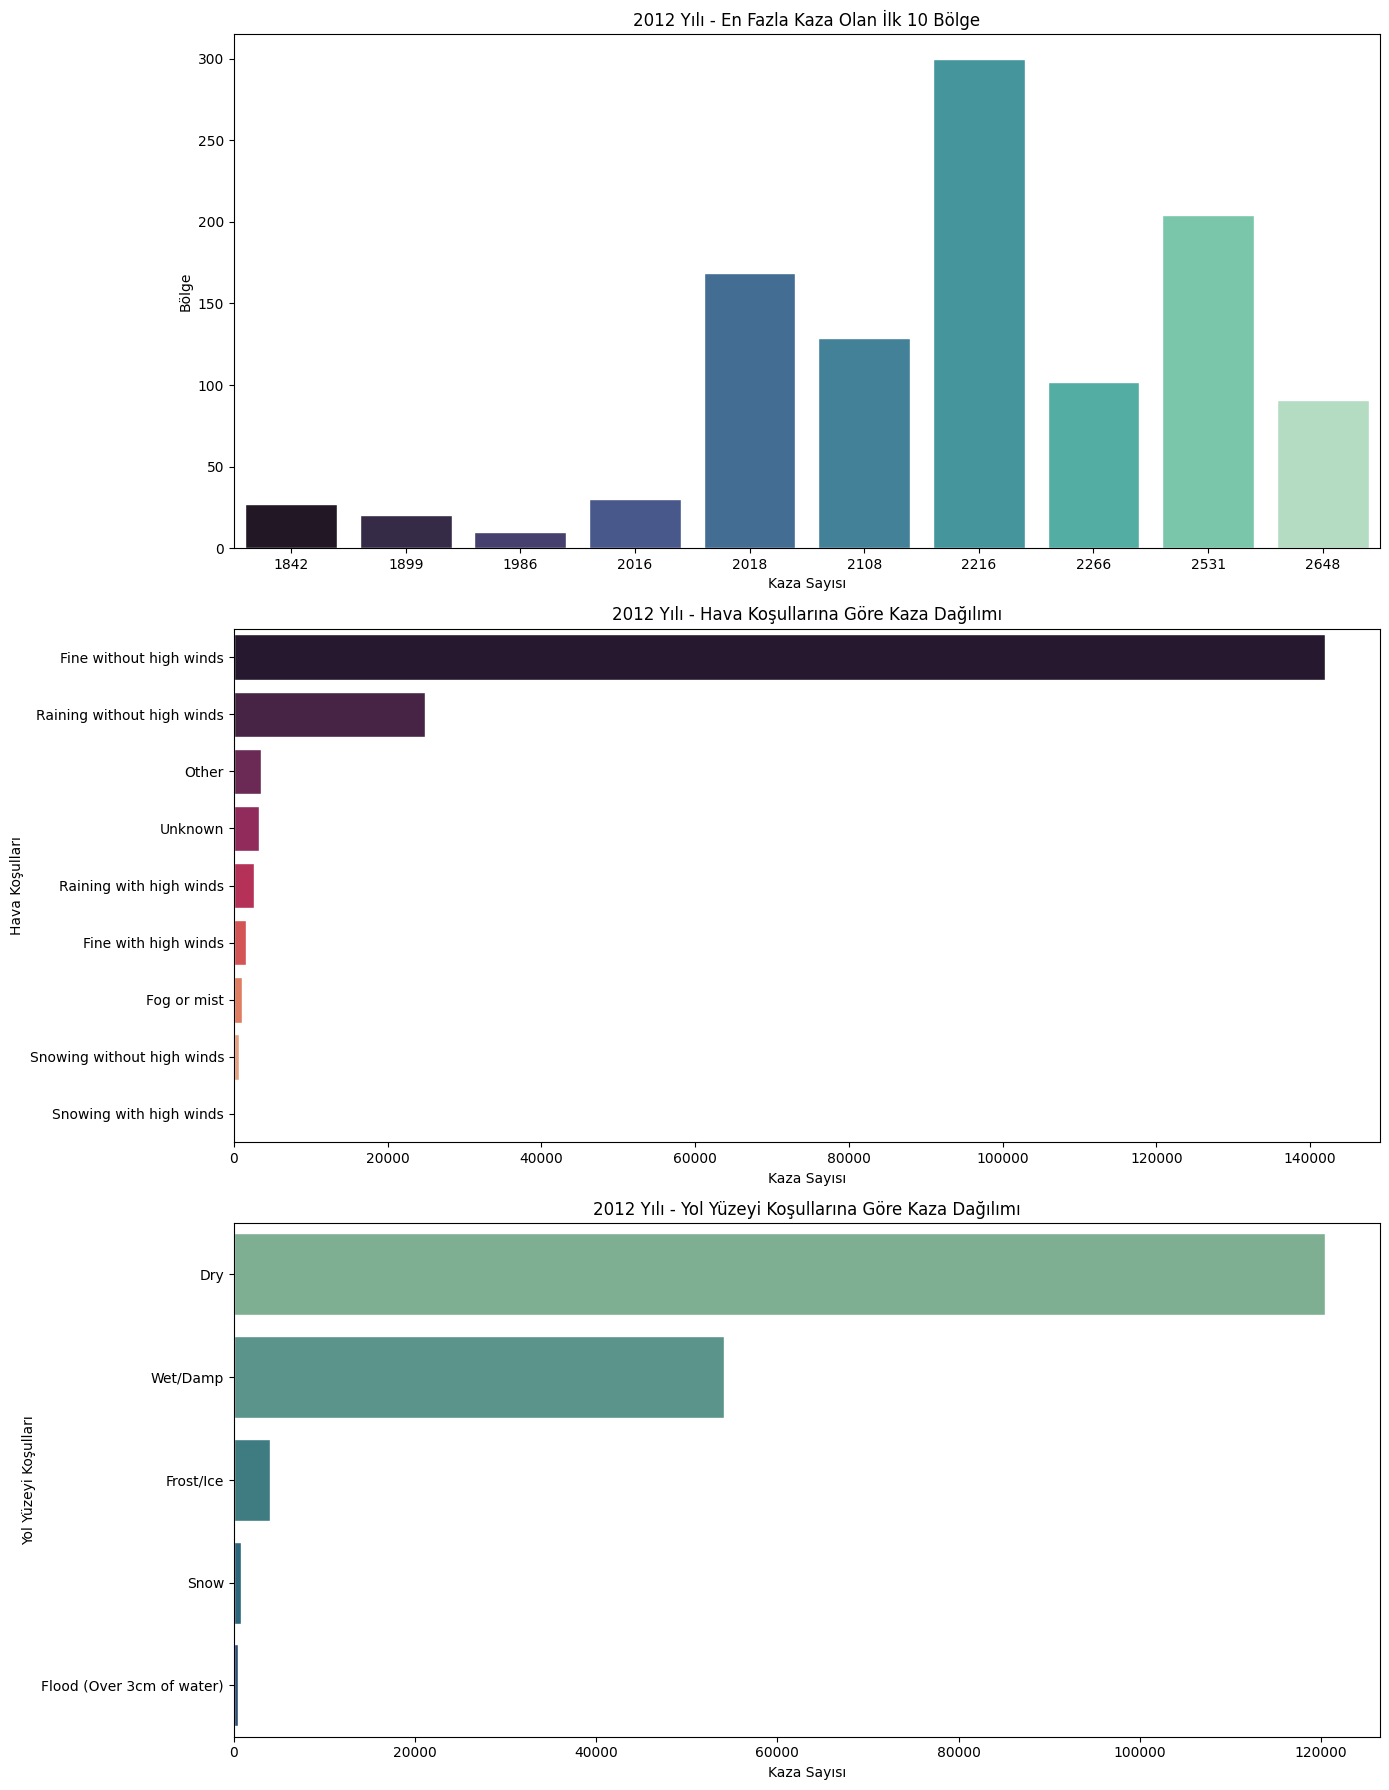

In [35]:
# bölge bazlı veya hava durumu, yol yüzeyi gibi koşullarla da derinlemesine inceleme

# 2012 yılına ait kazaları filtrele
accidents_2012 = accidents_df[accidents_df['Year'] == 2012]

# İlk 10 yerel yönetim birimi (local authority)
top_local_auths = accidents_2012['Local_Authority_(District)'].value_counts().nlargest(10)

# Hava koşulları
weather_conditions = accidents_2012['Weather_Conditions'].value_counts()

# Yol yüzeyi koşulları
road_surface = accidents_2012['Road_Surface_Conditions'].value_counts()

# Grafik ayarları
fig, axs = plt.subplots(3, 1, figsize=(14, 18))
sns.set_style("whitegrid")

# Bölge bazlı kaza sayısı
sns.barplot(x=top_local_auths.values, y=top_local_auths.index, ax=axs[0], palette="mako")
axs[0].set_title("2012 Yılı - En Fazla Kaza Olan İlk 10 Bölge")
axs[0].set_xlabel("Kaza Sayısı")
axs[0].set_ylabel("Bölge")

# Hava durumu dağılımı
sns.barplot(x=weather_conditions.values, y=weather_conditions.index, ax=axs[1], palette="rocket")
axs[1].set_title("2012 Yılı - Hava Koşullarına Göre Kaza Dağılımı")
axs[1].set_xlabel("Kaza Sayısı")
axs[1].set_ylabel("Hava Koşulları")

# Yol yüzeyi koşulları
sns.barplot(x=road_surface.values, y=road_surface.index, ax=axs[2], palette="crest")
axs[2].set_title("2012 Yılı - Yol Yüzeyi Koşullarına Göre Kaza Dağılımı")
axs[2].set_xlabel("Kaza Sayısı")
axs[2].set_ylabel("Yol Yüzeyi Koşulları")

plt.tight_layout()
plt.show()

In [36]:
# Kaza şiddeti ile hava durumu, yol yüzeyi ve ışık koşulları gibi kategorik değişkenler arasında anlamlı bir ilişki olup olmadığı
# Chi-Square Testi (Kategorik veriler için)
from scipy.stats import chi2_contingency

# Yardımcı fonksiyon
def chi_square_test(df, col, target='Accident_Severity'):
    contingency_table = pd.crosstab(df[col], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"'{col}' ile '{target}' arasında ilişki testi:")
    print(f"Chi2 Değeri: {chi2:.2f} | p-değeri: {p:.4f}")
    print("Anlamlı mı?", "✅ EVET" if p < 0.05 else "❌ HAYIR")
    print("-" * 50)

# 2012 yılı için testler
chi_square_test(accidents_2012, 'Weather_Conditions')
chi_square_test(accidents_2012, 'Road_Surface_Conditions')
chi_square_test(accidents_2012, 'Light_Conditions')

'Weather_Conditions' ile 'Accident_Severity' arasında ilişki testi:
Chi2 Değeri: 189.40 | p-değeri: 0.0000
Anlamlı mı? ✅ EVET
--------------------------------------------------
'Road_Surface_Conditions' ile 'Accident_Severity' arasında ilişki testi:
Chi2 Değeri: 46.43 | p-değeri: 0.0000
Anlamlı mı? ✅ EVET
--------------------------------------------------
'Light_Conditions' ile 'Accident_Severity' arasında ilişki testi:
Chi2 Değeri: 1102.59 | p-değeri: 0.0000
Anlamlı mı? ✅ EVET
--------------------------------------------------


In [37]:
# 🤖 2. Basit Makine Öğrenmesi Modeli: Kaza Şiddeti Tahmini
#🎯 Amaç: # Accident_Severity değişkenini tahmin etmek (örnek model: Random Forest)
#📌 Veri Hazırlığı ve Modelleme

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Sadece ilgili sütunları seç
features = ['Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions']
df_model = accidents_2012[features + ['Accident_Severity']].dropna()

# Kategorik değişkenleri sayısal hale getir
le = LabelEncoder()
for col in features + ['Accident_Severity']:
    df_model[col] = le.fit_transform(df_model[col])

# Bağımlı ve bağımsız değişkenler
X = df_model[features]
y = df_model['Accident_Severity']

# Eğitim-test bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğit
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred = model.predict(X_test)
print("📊 Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))
print("🧩 Karışıklık Matrisi:\n", confusion_matrix(y_test, y_pred))



📊 Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       390
           1       0.33      0.00      0.00      5326
           2       0.84      1.00      0.91     30227

    accuracy                           0.84     35943
   macro avg       0.39      0.33      0.30     35943
weighted avg       0.76      0.84      0.77     35943

🧩 Karışıklık Matrisi:
 [[    0     0   390]
 [    0     1  5325]
 [    0     2 30225]]


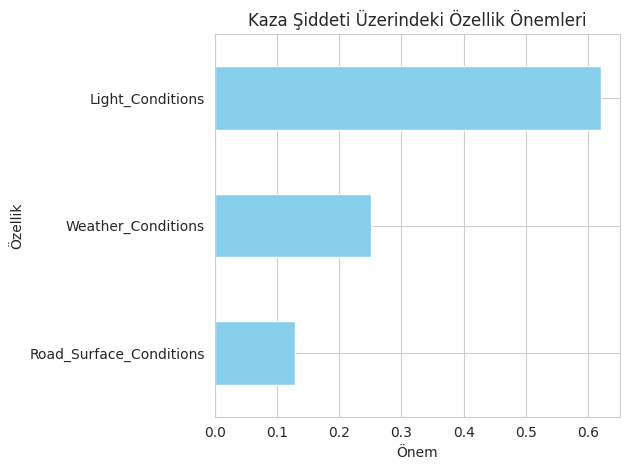

In [38]:
# Önemli Özellikler Grafiği
import seaborn as sns
import matplotlib.pyplot as plt

feature_importances = pd.Series(model.feature_importances_, index=features)
feature_importances.sort_values().plot(kind='barh', color='skyblue')
plt.title('Kaza Şiddeti Üzerindeki Özellik Önemleri')
plt.xlabel('Önem')
plt.ylabel('Özellik')
plt.tight_layout()
plt.show()

In [40]:
print(df_2012.columns)

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Control', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year', 'Accident_Year'],
      dtype='object')


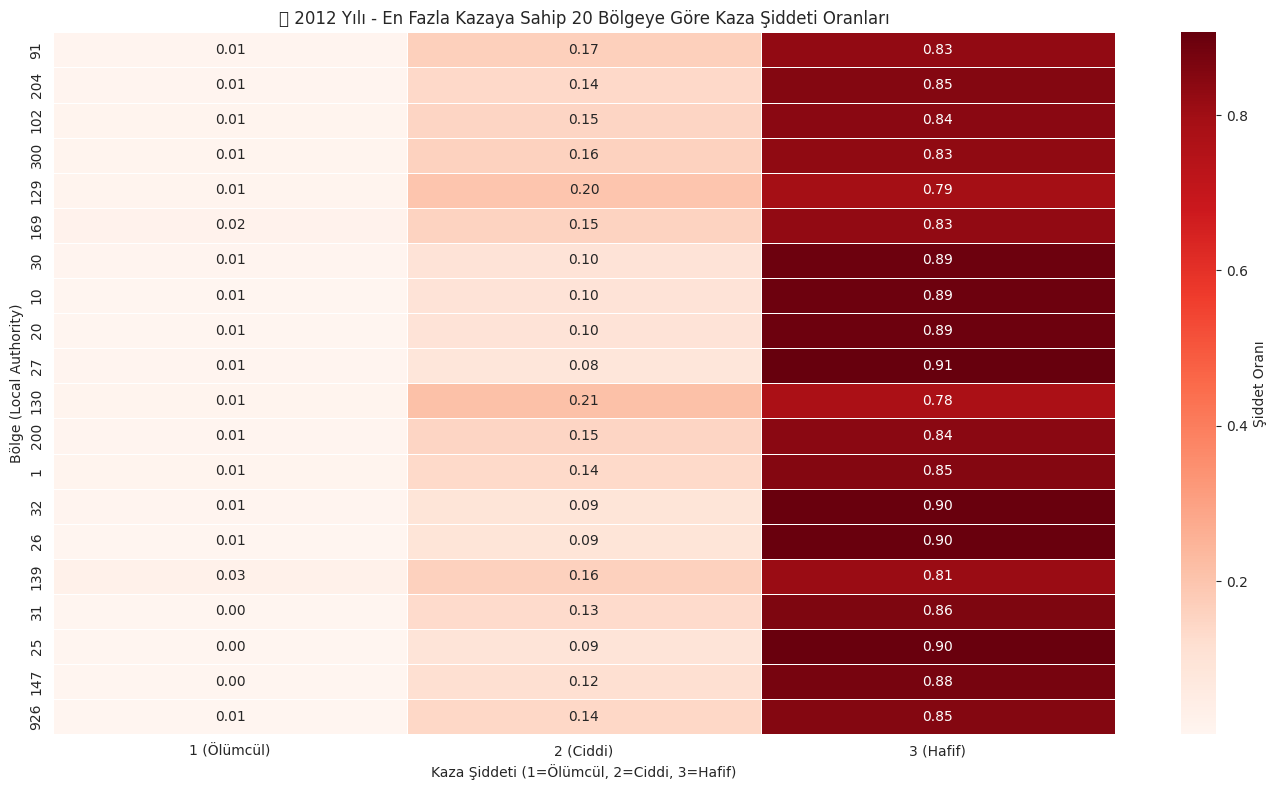

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kaza şiddetini bölgelere göre grupla
grouped = df_2012.groupby(['Local_Authority_(District)', 'Accident_Severity']).size().unstack(fill_value=0)

# Toplam kazalara oranla normalleştir
normalized = grouped.div(grouped.sum(axis=1), axis=0)

# En çok kazaya sahip ilk 20 bölgeyi seç
top_20_regions = grouped.sum(axis=1).sort_values(ascending=False).head(20).index
filtered_normalized = normalized.loc[top_20_regions]

# Heatmap çizimi
plt.figure(figsize=(14, 8))
sns.heatmap(filtered_normalized, cmap="Reds", annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Şiddet Oranı'})
plt.title("🚧 2012 Yılı - En Fazla Kazaya Sahip 20 Bölgeye Göre Kaza Şiddeti Oranları")
plt.ylabel("Bölge (Local Authority)")
plt.xlabel("Kaza Şiddeti (1=Ölümcül, 2=Ciddi, 3=Hafif)")
plt.xticks([0.5, 1.5, 2.5], ['1 (Ölümcül)', '2 (Ciddi)', '3 (Hafif)'])
plt.tight_layout()
plt.show()


In [42]:
# Kayıt Sayısında Anormal Artış?
# Yıllara göre kayıt sayısını karşılaştıralım
accidents_df['Accident_Year'] = pd.to_datetime(accidents_df['Date'], dayfirst=True).dt.year
yearly_counts = accidents_df['Accident_Year'].value_counts().sort_index()
print(yearly_counts)


Accident_Year
2005    198735
2006    189161
2007    182115
2009    163554
2010    154414
2011    151474
2012    179715
2013    138660
2014    146322
Name: count, dtype: int64


In [43]:
# Kpya veya Çoğaltılmış Kayıtlar?
# Hipotez: Aynı kaza birden fazla kez kaydedilmiş olabilir.
# 2012 verisinde aynı tarih, saat, konum, yol tipi olan kayıtlar varsa grupla
duplicates = df_2012.groupby(['Date', 'Time', 'Latitude', 'Longitude', 'Road_Type']).size()
potential_duplicates = duplicates[duplicates > 1]
print("Potansiyel çoğaltılmış kayıt sayısı:", potential_duplicates.shape[0])

Potansiyel çoğaltılmış kayıt sayısı: 34148


In [44]:
# Boş ya da Geçersiz Değerler?
# Hipotez: 2012 yılında veri girilirken bazı alanlar eksik, boş veya geçersiz girilmiş olabilir.
missing_2012 = df_2012.isnull().mean().sort_values(ascending=False)
print("2012 yılı verisinde boş değer oranları:")
print(missing_2012[missing_2012 > 0])

2012 yılı verisinde boş değer oranları:
Series([], dtype: float64)


<Axes: xlabel='Accident_Year'>

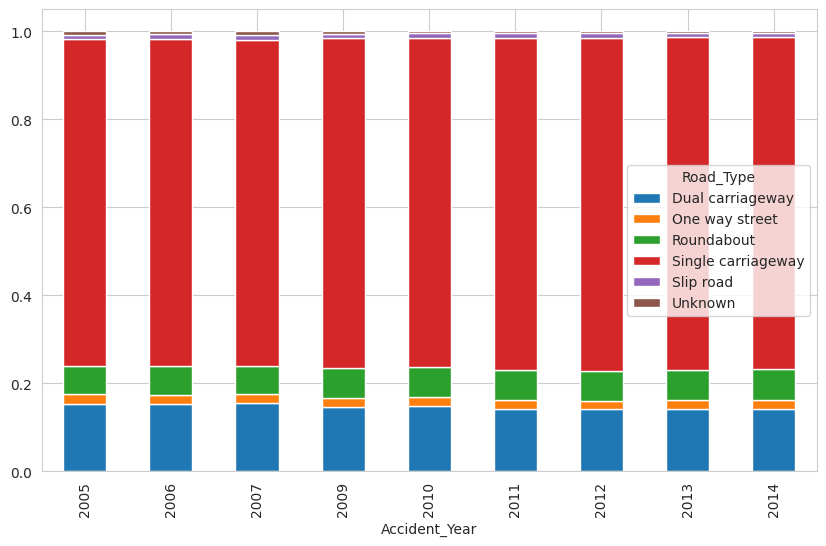

In [45]:
# Dağılımda Bozulma Var mı? (Yol tipi, hava durumu vs.)
# Hipotez: 2012 yılında belirli bir yol tipi veya hava durumu altında kazalar yapay şekilde artmış görünüyor olabilir.
# Yıl bazlı yol tipi dağılımı
pd.crosstab(accidents_df['Accident_Year'], accidents_df['Road_Type'], normalize='index').plot(kind='bar', stacked=True, figsize=(10,6))

In [46]:
# Zaman Dağılımında Anormallik? (Saat / Ay)
# Hipotez: 2012 yılında özellikle belli saatlerde ya da aylarda yığılma olabilir.
# Aylık kaza sayısı
df_2012['Month'] = pd.to_datetime(df_2012['Date'], dayfirst=True).dt.month
monthly_counts = df_2012['Month'].value_counts().sort_index()
print("2012 - Aylık kaza sayıları:")
print(monthly_counts)


2012 - Aylık kaza sayıları:
Month
1     14987
2     13746
3     15390
4     13630
5     15264
6     14012
7     15644
8     14410
9     15936
10    16038
11    16224
12    14434
Name: count, dtype: int64


In [3]:
!pip install geopandas folium

In [39]:
# 2012 yılına ait verileri filtrele
df_2012 = accidents_df[pd.to_datetime(accidents_df['Date'], dayfirst=True).dt.year == 2012]


In [40]:
import geopandas as gpd
import folium
import pandas as pd


In [41]:
# Local Authority bazlı kaza sayısını al
local_accidents_2012 = df_2012['Local_Authority_(District)'].value_counts().reset_index()
local_accidents_2012.columns = ['LAD16NM', 'Accident_Count']



In [ ]:
# GeoJSON dosyasının yolunu doğru şekilde verin
geo_df = gpd.read_file('/kaggle/input/2000-16-traffic-flow-england-scotland-wales/Local_Authority_Districts_Dec_2016.geojson')

# Kaza sayılarıyla eşleştir
merged = geo_df.merge(local_accidents_2012, left_on='lad16nm', right_on='LAD16NM', how='left')
merged['Accident_Count'] = merged['Accident_Count'].fillna(0)


In [43]:
print(local_accidents_2012['LAD16NM'].unique())
print(geo_df['lad16nm'].unique())


[ 91 204 102 300 129 169  30  10  20  27 130 200   1  32  26 139  31  25
 147 926 596 203 128 215   9 923 150   5  95 601  93   8   4 635 364 146
 100 206  79  71 182  28   7  22   3 346 148  18  70 211 189  24   2 114
   6  17 228 231 107 565  76  21  14  19  12 109  11  23  92 479 286 104
  13 257 394 323  90 101  15 424 498 500 112 110 106 741 544 511 302  83
 583 213 181 202 124  73  84  65 911  62 210 149 640 186 513 351 932 233
  60 612  72 232 751 161 536 496 305  85  16 309 745 421 927 938 633  29
 285 393 303 395 925 605 473 462 482 753 505 450 532  75 744 460 538  77
 531 455 556  74 476 474 454 643 420 940 510 434 255 542 187 390 570 456
 514 910 530  63 481 345 293 251 471 307 516 480 355 724  40 245 935 412
 517 472 611 484 563 610 502  64 353 540 384 356 461 585 559 185 491 294
 184 752 490 404 515 180 541 917 407 725 580 306 512 432 934 254 243  33
 292 587 284 340 501 416 341 438 492  82 451 483  80 533 431 252 543 362
 645 477 253 433 562 290 277 415 320 347 581 352 49

In [44]:
print(local_accidents_2012.columns.tolist())

['LAD16NM', 'Accident_Count']


In [54]:
local_accidents_2012['lad16nm'] = local_accidents_2012['lad16nm'].astype(str)

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Tarihleri datetime formatına çevir
accidents_df['Date'] = pd.to_datetime(accidents_df['Date'], dayfirst=True)

# 2012 yılına ait verileri filtrele
df_2012 = accidents_df[accidents_df['Date'].dt.year == 2012]

# Yerel yönetim adına göre kaza sayısını gruplandır
local_accidents_2012 = df_2012['Local_Authority_(District)'].value_counts().reset_index()
local_accidents_2012.columns = ['lad16nm', 'Accident_Count']

# geo_df ile birleştir
merged = geo_df.merge(local_accidents_2012, on='lad16nm', how='left')
merged['Accident_Count'] = merged['Accident_Count'].fillna(0)

# Harita çizimi
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged.plot(column='Accident_Count', ax=ax, legend=True, cmap='OrRd', edgecolor='black')
ax.set_title('2012 Yılına Ait İlçe Bazlı Kaza Sayıları', fontsize=15)
plt.axis('off')
plt.show()

ValueError: You are trying to merge on object and int64 columns for key 'lad16nm'. If you wish to proceed you should use pd.concat

In [49]:
print(geo_df.columns)
print(local_accidents_2012.columns)

Index(['objectid', 'lad16cd', 'lad16nm', 'lad16nmw', 'bng_e', 'bng_n', 'long',
       'lat', 'st_areashape', 'st_lengthshape', 'geometry'],
      dtype='object')
Index(['lad16nm', 'Accident_Count'], dtype='object')


In [57]:
print(local_accidents_2012.columns)
print(geo_df.columns)

Index(['lad16nm', 'Accident_Count'], dtype='object')
Index(['objectid', 'lad16cd', 'lad16nm', 'lad16nmw', 'bng_e', 'bng_n', 'long',
       'lat', 'st_areashape', 'st_lengthshape', 'geometry'],
      dtype='object')


In [58]:
# Gerekirse yeniden adlandır
local_accidents_2012.rename(columns={'LAD16NM': 'lad16nm'}, inplace=True)

# Her iki sütunu string'e çevir
geo_df['lad16nm'] = geo_df['lad16nm'].astype(str)
local_accidents_2012['lad16nm'] = local_accidents_2012['lad16nm'].astype(str)

In [59]:
merged = geo_df.merge(local_accidents_2012, on='lad16nm', how='left')
merged['Accident_Count'] = merged['Accident_Count'].fillna(0)

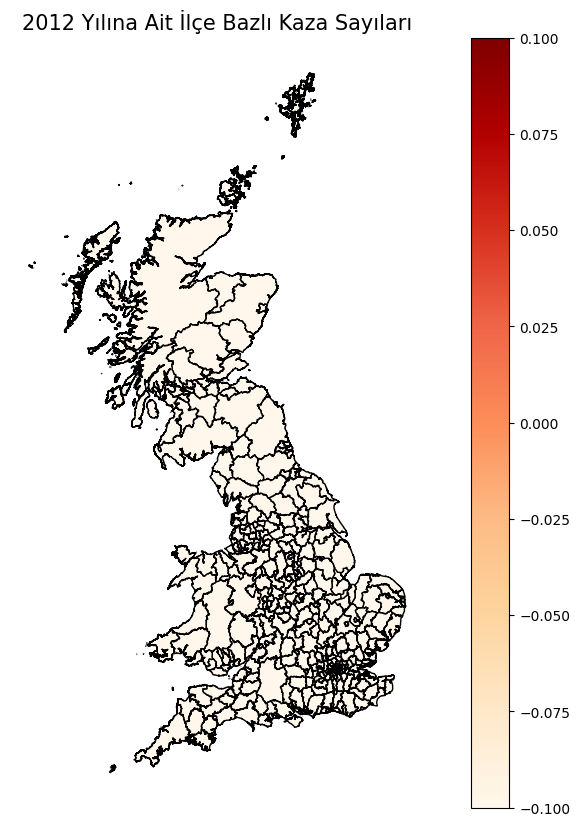

In [60]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged.plot(column='Accident_Count', ax=ax, legend=True, cmap='OrRd', edgecolor='black')
ax.set_title('2012 Yılına Ait İlçe Bazlı Kaza Sayıları', fontsize=15)
plt.axis('off')
plt.show()

GeoDF columns: Index(['objectid', 'lad16cd', 'lad16nm', 'lad16nmw', 'bng_e', 'bng_n', 'long',
       'lat', 'st_areashape', 'st_lengthshape', 'geometry'],
      dtype='object')
Accident DF columns: Index(['lad16nm', 'Accident_Count'], dtype='object')


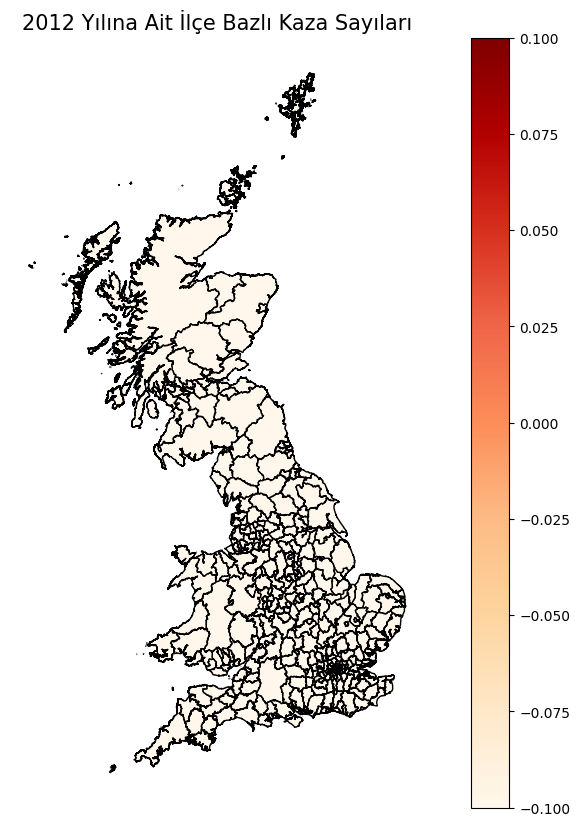

In [63]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 1. GeoDataFrame ve kaza verisini yüklediğini varsayıyoruz:
# geo_df = gpd.read_file("path_to_shapefile.shp")
# local_accidents_2012 = accidents_df[accidents_df['Year'] == 2012]

# 2. Sütun isimlerini kontrol et
print("GeoDF columns:", geo_df.columns)
print("Accident DF columns:", local_accidents_2012.columns)

# 3. local_accidents_2012'yi ilçe bazında grupla
local_accidents_2012_grouped = local_accidents_2012.groupby('lad16nm').size().reset_index(name='Accident_Count')

# 4. Eşleştirme için sütun adlarını uyumlu hale getir
geo_df['lad16nm'] = geo_df['lad16nm'].astype(str)
local_accidents_2012_grouped.rename(columns={'Local_Authority_(District)': 'lad16nm'}, inplace=True)
local_accidents_2012_grouped['lad16nm'] = local_accidents_2012_grouped['lad16nm'].astype(str)

# 5. Veri setlerini birleştir
merged = geo_df.merge(local_accidents_2012_grouped, on='lad16nm', how='left')
merged['Accident_Count'] = merged['Accident_Count'].fillna(0)

# 6. Harita çizimi
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged.plot(column='Accident_Count', ax=ax, legend=True, cmap='OrRd', edgecolor='black')
ax.set_title('2012 Yılına Ait İlçe Bazlı Kaza Sayıları', fontsize=15)
plt.axis('off')
plt.show()

In [64]:
print(merged.columns)
print(merged['Accident_Count'].describe())
print(merged['Accident_Count'].value_counts())

Index(['objectid', 'lad16cd', 'lad16nm', 'lad16nmw', 'bng_e', 'bng_n', 'long',
       'lat', 'st_areashape', 'st_lengthshape', 'geometry', 'Accident_Count'],
      dtype='object')
count    380.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: Accident_Count, dtype: float64
Accident_Count
0.0    380
Name: count, dtype: int64


In [66]:
print(local_accidents_2012.columns)


Index(['lad16nm', 'Accident_Count'], dtype='object')


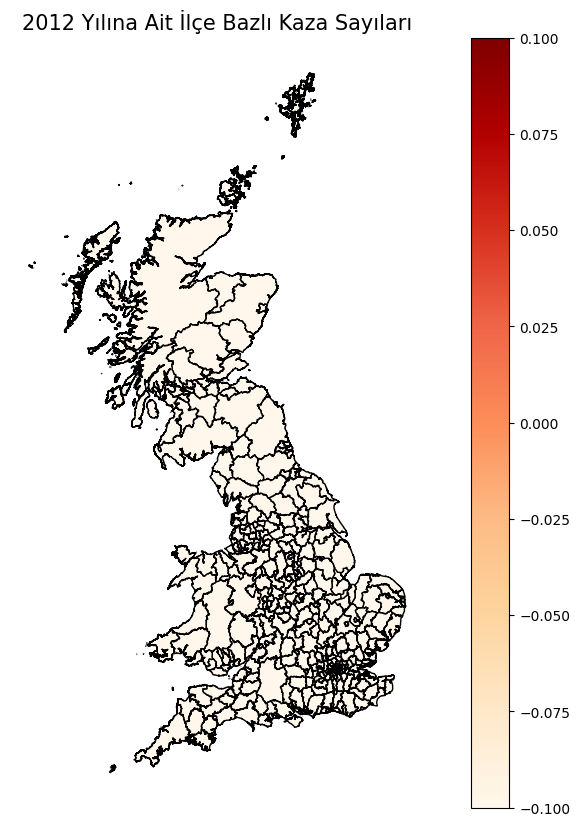

In [67]:
# 1. Verileri birleştir
merged = geo_df.merge(local_accidents_2012, on='lad16nm', how='left')

# 2. Kaza verisi olmayan bölgeleri 0 yap
merged['Accident_Count'] = merged['Accident_Count'].fillna(0)

# 3. Haritayı çiz
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged.plot(column='Accident_Count', ax=ax, legend=True, cmap='OrRd', edgecolor='black')

ax.set_title('2012 Yılına Ait İlçe Bazlı Kaza Sayıları', fontsize=15)
plt.axis('off')
plt.show()


In [68]:
# Hangi ilçede kaç kaza olduğunu görelim
print(local_accidents_2012.sort_values('Accident_Count', ascending=False).head(10))


  lad16nm  Accident_Count
0      91            2648
1     204            2531
2     102            2266
3     300            2216
4     129            2108
5     169            2018
6      30            2016
7      10            1986
8      20            1899
9      27            1842


In [69]:
# GeoDF'deki ilçeler
geo_names = set(geo_df['lad16nm'].str.lower().str.strip())

# Kaza verisindeki ilçeler
accident_names = set(local_accidents_2012['lad16nm'].str.lower().str.strip())

# Eşleşmeyenler
unmatched = accident_names - geo_names
print("Eşleşmeyen ilçe isimleri:", unmatched)


Eşleşmeyen ilçe isimleri: {'635', '341', '929', '64', '189', '923', '622', '530', '367', '745', '340', '307', '204', '741', '386', '941', '722', '424', '354', '601', '26', '345', '927', '274', '150', '74', '75', '407', '1', '107', '463', '642', '922', '511', '621', '475', '470', '231', '928', '77', '82', '605', '461', '385', '517', '510', '284', '485', '581', '63', '539', '321', '255', '91', '430', '146', '25', '306', '380', '65', '609', '10', '28', '80', '532', '454', '497', '733', '588', '361', '720', '62', '73', '250', '185', '479', '647', '400', '30', '538', '742', '624', '148', '608', '309', '128', '38', '412', '740', '343', '8', '459', '101', '437', '258', '9', '515', '366', '940', '16', '498', '29', '563', '587', '245', '83', '291', '431', '432', '493', '919', '495', '914', '300', '277', '22', '544', '395', '393', '363', '15', '92', '911', '294', '723', '76', '734', '612', '278', '14', '410', '293', '746', '416', '6', '186', '478', '434', '533', '413', '243', '916', '421', '114'

In [70]:
print(local_accidents_2012.columns)


Index(['lad16nm', 'Accident_Count'], dtype='object')


In [71]:
print(local_accidents_2012.iloc[:10])


  lad16nm  Accident_Count
0      91            2648
1     204            2531
2     102            2266
3     300            2216
4     129            2108
5     169            2018
6      30            2016
7      10            1986
8      20            1899
9      27            1842


In [73]:
print(accidents_df.columns)


Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')


In [75]:
# 2012 yılına ait verileri filtrele
local_accidents_2012 = accidents_df[accidents_df['Year'] == 2012]

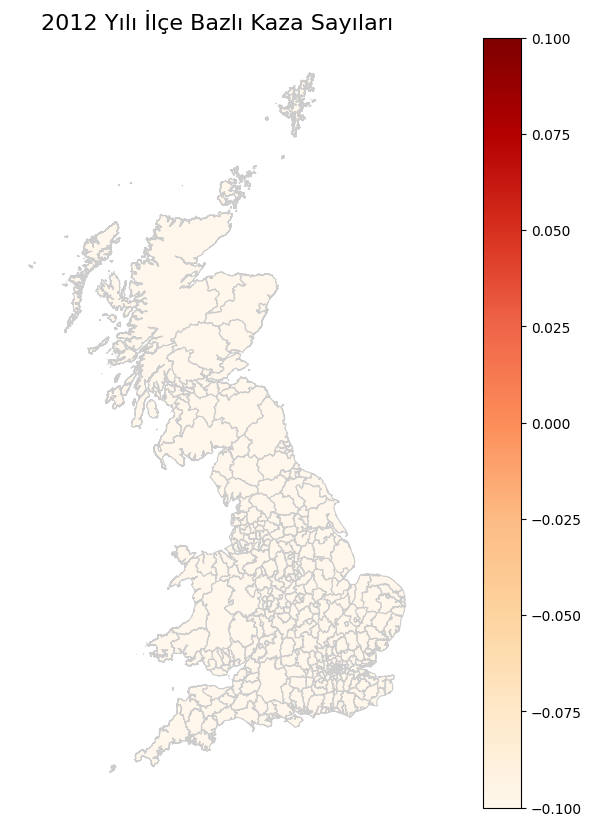

In [77]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# GeoJSON veri setini oku
geo_df = gpd.read_file('/kaggle/input/2000-16-traffic-flow-england-scotland-wales/Local_Authority_Districts_Dec_2016.geojson')

# Kaza verisini oku
accidents_df = pd.read_csv('/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv')

# 2012 yılını filtrele
local_accidents_2012 = accidents_df[accidents_df['Year'] == 2012]

# İlçeye göre kaza sayısını gruplandır
accidents_by_district = local_accidents_2012.groupby('Local_Authority_(District)').size().reset_index(name='Accident_Count')

# İlçe sütunlarını string'e çevir (tip uyuşmazlığını çözmek için)
accidents_by_district['Local_Authority_(District)'] = accidents_by_district['Local_Authority_(District)'].astype(str)
geo_df['lad16nm'] = geo_df['lad16nm'].astype(str)

# GeoDataFrame ile kaza verisini birleştir
merged = geo_df.merge(accidents_by_district, how='left', left_on='lad16nm', right_on='Local_Authority_(District)')

# NaN değerleri sıfırla (kaza olmayan bölgeler için)
merged['Accident_Count'] = merged['Accident_Count'].fillna(0)

# Haritayı çiz
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Accident_Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('2012 Yılı İlçe Bazlı Kaza Sayıları', fontdict={'fontsize': 16})
ax.axis('off')
plt.show()


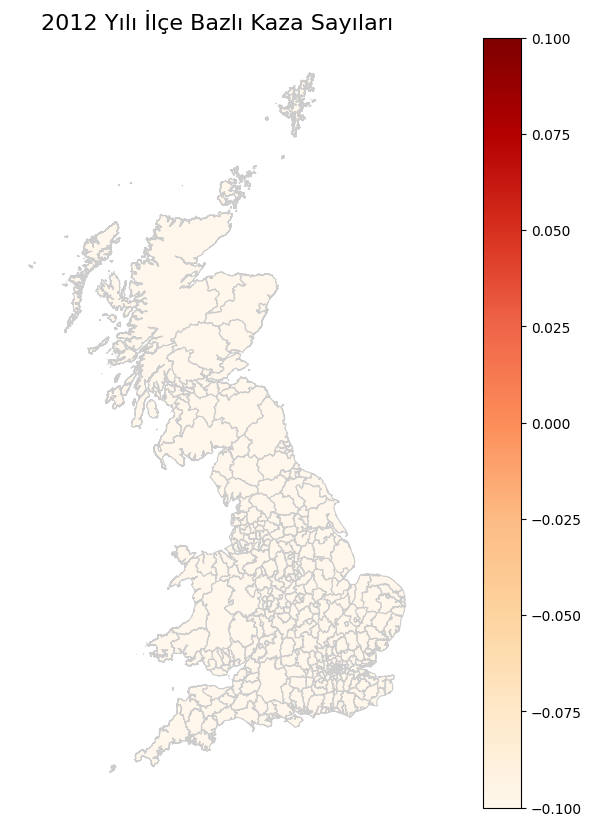

In [78]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# GeoJSON veri setini oku
geo_df = gpd.read_file('/kaggle/input/2000-16-traffic-flow-england-scotland-wales/Local_Authority_Districts_Dec_2016.geojson')

# Kaza verisini oku
accidents_df = pd.read_csv('/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv')

# 2012 yılını filtrele
local_accidents_2012 = accidents_df[accidents_df['Year'] == 2012]

# İlçeye göre kaza sayısını gruplandır
accidents_by_district = local_accidents_2012.groupby('Local_Authority_(District)').size().reset_index(name='Accident_Count')

# İlçe sütunlarını string'e çevir
accidents_by_district['Local_Authority_(District)'] = accidents_by_district['Local_Authority_(District)'].astype(str)
geo_df['lad16nm'] = geo_df['lad16nm'].astype(str)

# Birleştir
merged = geo_df.merge(accidents_by_district, how='left', left_on='lad16nm', right_on='Local_Authority_(District)')

# NaN'leri 0 yap, veri tipini int'e zorla
merged['Accident_Count'] = merged['Accident_Count'].fillna(0).astype(int)

# Min ve max kazaları hesapla
vmin = merged['Accident_Count'].min()
vmax = merged['Accident_Count'].max()

# Haritayı çiz
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Accident_Count',
            cmap='OrRd',
            linewidth=0.8,
            ax=ax,
            edgecolor='0.8',
            legend=True,
            vmin=vmin,
            vmax=vmax)
ax.set_title('2012 Yılı İlçe Bazlı Kaza Sayıları', fontdict={'fontsize': 16})
ax.axis('off')
plt.show()


In [79]:
# Eşleşen ilçelerin sayısını ve eşleşmeyenleri göster
merged_check = geo_df.merge(accidents_by_district, how='left', left_on='lad16nm', right_on='Local_Authority_(District)')
missing = merged_check[merged_check['Accident_Count'].isna()]

print(f"Eşleşmeyen ilçe sayısı: {len(missing)}")
print("\nEşleşmeyen ilçe adları (ilk 10):")
print(missing['lad16nm'].unique()[:10])


Eşleşmeyen ilçe sayısı: 380

Eşleşmeyen ilçe adları (ilk 10):
['Hartlepool' 'Middlesbrough' 'Redcar and Cleveland' 'Stockton-on-Tees'
 'Darlington' 'Halton' 'Warrington' 'Blackburn with Darwen' 'Blackpool'
 'Kingston upon Hull, City of']


In [81]:
pip install fuzzywuzzy python-Levenshtein


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 4.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.5 MB/s eta 0:00:00:00:01
Note: you may need to restart the kernel to use updated packages.


In [85]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from fuzzywuzzy import process

# 1. Verileri yükle
accidents_df = pd.read_csv("Accidents_2012.csv", low_memory=False)
geo_df = gpd.read_file("Local_Authority_Districts_(December_2016)_Boundaries_in_Great_Britain.geojson")

# 2. İlçe isimlerini metne çevir
accidents_df['Local_Authority_(District)'] = accidents_df['Local_Authority_(District)'].astype(str)

# 3. İlçe bazlı kaza sayısını hesapla
accidents_by_district = accidents_df.groupby('Local_Authority_(District)').size().reset_index(name='accident_count')

# 4. Eşleşme fonksiyonu
def match_district_name(name, choices):
    match, score = process.extractOne(name, choices)
    return match if score > 80 else None

# 5. Fuzzy eşleşmeleri yap
district_names_geo = geo_df['lad16nm'].astype(str).unique()
accidents_by_district['matched_name'] = accidents_by_district['Local_Authority_(District)'].apply(
    lambda x: match_district_name(x, district_names_geo)
)

# 6. Harita ile birleştir
merged = geo_df.merge(accidents_by_district, left_on='lad16nm', right_on='matched_name', how='left')

# 7. Eksik verileri 0 ile doldur
merged['accident_count'] = merged['accident_count'].fillna(0)

# 8. Normalizasyon
merged['accident_count_norm'] = (merged['accident_count'] - merged['accident_count'].mean()) / merged['accident_count'].std()

# 9. Haritayı çiz
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
merged.plot(column='accident_count_norm', cmap='OrRd', linewidth=0.5, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('2012 Yılı İlçe Bazlı Kaza Sayıları', fontsize=15)
ax.axis('off')
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'Accidents_2012.csv'

In [84]:
# Eşleşme başarı oranını kontrol et
total = len(accidents_by_district)
matched = accidents_by_district['matched_name'].notna().sum()
print(f"Eşleşen ilçe sayısı: {matched}/{total} ({matched/total:.2%})")

# Eşleşmeyen ilk 10 örnek
unmatched = accidents_by_district[accidents_by_district['matched_name'].isna()]
print("Eşleşmeyen ilk 10 ilçe:")
print(unmatched['Local_Authority_(District)'].head(10).tolist())


Eşleşen ilçe sayısı: 0/380 (0.00%)
Eşleşmeyen ilk 10 ilçe:
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']


In [86]:
accidents_df['Local_Authority_(District)'].unique()[:20]

array([ 12,   1,  11,  28, 570,   3,   5,   4,   8,   2,   9,  30,  31,
        27,  25,  17,  24,  57,  26,  13])

In [87]:
accidents_df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [88]:
print(accidents_df['Local_Authority_(Highway)'].unique()[:20])


['E09000020' 'E09000033' 'E09000013' 'E09000005' 'E09000001' 'E09000019'
 'E09000030' 'E09000012' 'E09000028' 'E09000007' 'E09000022' 'E09000003'
 'E09000014' 'E09000009' 'E09000018' 'E09000025' 'E09000027' 'EHEATHROW'
 'E09000017' 'E09000031']
